# Welcome to the Cobratoolbox Tutorial in Matlab!

The purpose of this tutorial is to show a beginner how the COBRA Toolbox can be used in Matlab to explore the physiology of a cell. To illustrate the capabilities of the COBRA Toolbox, we'll focus on exploring the attributes of the Synechococcus elongatus 7942 model that was developed by the Golden and Palsson labs.  
#### what the heck is COBRA? 
COnstraint-Based Reconstruction and Analysis (COBRA)

**We'll try to hit on the following important topics:**

1. The limitations of constraint-based modeling.
2. Basic components of a COBRA model including: A) genes, B) reactions, C) metabolites, D) gene-protein-reaction associations, E) constraints, and F) objective functions.
3. An overview of flux balance analysis.
4. The subsystems of the S.elongatus model involving energy management of the cell, glycolysis pathway, pentose phosphate pathway, tricarbonoxylic acid cycle, etc.


### To use the COBRA toolbox you first have to initalize the Matlab environment to include all the COBRA Toolbox functions. 

Before initializing the COBRA Toolbox, we havd already set up a folder that contains out colbratoolbox functions and our modeling files that we have prepared. The COBRA Toolbox initialization is accomplished with the "initCobraToolbox" function as shown below.


In [1]:
initCobraToolbox



      _____   _____   _____   _____     _____     |
     /  ___| /  _  \ |  _  \ |  _  \   / ___ \    |   COnstraint-Based Reconstruction and Analysis
     | |     | | | | | |_| | | |_| |  | |___| |   |   The COBRA Toolbox - 2017
     | |     | | | | |  _  { |  _  /  |  ___  |   |
     | |___  | |_| | | |_| | | | \ \  | |   | |   |   Documentation:
     \_____| \_____/ |_____/ |_|  \_\ |_|   |_|   |   http://opencobra.github.io/cobratoolbox
                                                  | 

 > Checking if git is installed ...  Done.
 > Checking if the repository is tracked using git ...  Done.
 > Checking if curl is installed ...  Done.
 > Checking if remote can be reached ...  Done.
 > Initializing and updating submodules ... Done.
 > Adding all the files of The COBRA Toolbox ...  Done.
 > Define CB map output... set to svg.
 > Retrieving models ...   Done.
 > TranslateSBML is installed and working properly.
 > Configuring solver environment variables ...
   - ILOG_CPLEX_PATH:  -

## 1. What is constraint-based modeling?

Both genome-scale metabolic network reconstructions and constraint-based modeling can be used to model steady-state phenotypes during the exponential growth phase. This can be useful in accomplishing a number of things such as:
* exploring and understanding the capabilities of each phenotype.
* identify and modify cellular pathways to favor specific bioproduct producing phenotypes.
Understanding what it can not do is equally important. Constraint-based models do not:
* model transitions between phenotypes.
* include the genes required for the stationary phase (proteases, etc.).
* include the complete transcription and translation pathways.

#### I hear often about something called a biomass function, what is that?
Constraint-based models are based on a biomass function that represents the average metabolic load required during exponential cell growth. It represents the average percentages of the component parts (amino acids, nucleotides, energy, etc.) that are included in **1 gm dry weight per hour of cell biomass.**

Through the use of genome-scale metabolic network reconstructions, Flux Balance Analysis (FBA) can be used to calculate the flow of metabolites through a metabolic network. This capability makes it possible to predict the growth-rate of an organism and/or the rate of production of a given metabolite. It is important that it is understood that FBA has limitations! It does not use kinetic parameters, thus it cannot predict metabolite concentrations. It is also only capable of determining fluxes at steady state. Finally, traditional FBA does not account for regulatory effects such as the activation of enzymes by protein kinases or regulation of gene expression. Therefore, it's predictions may not always be accurate.

## 2. Lets load the Matlab version of the model (.mat) into the Matlab workspace

In [2]:
% load model
load('Model_iJB785.mat');
model = iJB785; 

We have loaded the model and asigned it to the variable model, lets call model and see what it returns:

In [3]:
model


model = 

           mets: {768x1 cell}
       metNames: {768x1 cell}
    metFormulas: {768x1 cell}
          genes: {785x1 cell}
        grRules: {850x1 cell}
           rxns: {850x1 cell}
       rxnNames: {850x1 cell}
     subSystems: {850x1 cell}
         csense: 'EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...'
              S: [768x850 double]
             lb: [850x1 double]
             ub: [850x1 double]
              b: [768x1 double]
              c: [850x1 double]
            rev: [850x1 int32]
    description: 'iJB785'



Now let's begin by exploring some of the Matlab code and COBRA toolbox functions that can be used to extract information about the genes from the model. The genes are only represented by their gene locus number (e.g. synpcc7942_1002). The gene name can be achieved with a quick google searchd. To start with, the genes included in the model and their geneIDs are stored in the "model.genes" structure. The "findGeneIDs" COBRA Toolbox function can be used to pull the geneID from the model structure. The first 10 genes in the model, and their geneIDs, can be printed out as follows.

In [4]:
genes = cellstr(model.genes(1:10));
geneIDs = findGeneIDs(model, model.genes(1:10));
printLabeledData(model.genes(1:10),geneIDs)

Synpcc7942_1448	1	
Synpcc7942_0707	2	
Synpcc7942_1029	3	
Synpcc7942_0596	4	
Synpcc7942_2561	5	
Synpcc7942_1007	6	
Synpcc7942_1225	7	
Synpcc7942_2258	8	
Synpcc7942_2047	9	
Synpcc7942_2308	10	


In [5]:
model.rxns(1:5)
model.genes(1:5)
printRxnFormula(model,'ENO')
printConstraints(model,-100, +100)



ans = 

    'QULNS'
    'ORNDC'
    'LEUTA'
    'MSBENZMT'
    'DESAT18a'


ans = 

    'Synpcc7942_1448'
    'Synpcc7942_0707'
    'Synpcc7942_1029'
    'Synpcc7942_0596'
    'Synpcc7942_2561'

ENO	2pg_c 	<=>	pep_c + h2o_c 

ans = 

    '2pg_c  <=> pep_c + h2o_c '

MinConstraitns:
EX_co2_e	-1.990000e+00
EX_cobalt2_e	-1.700000e-05
EX_zn2_e	-7.700000e-05
EX_so4_e	-3.000000e-02
EX_ca2_e	-2.400000e-02
EX_nh4_e	-3.100000e-03
EX_mn2_e	-9.000000e-04
EX_hco3_e	-1.990000e+00
EX_mg2_e	-3.000000e-02
EX_cu2_e	-3.000000e-05
EX_k_e	-4.600000e-02
EX_no3_e	-1.760000e+00
EX_fe3_e	-1.000000e-03
EX_mobd_e	-1.600000e-04
EX_na1_e	-1.798540e+00
EX_pi_e	-2.300000e-02
maxConstraints:
BOF	2.000000e+00


In [6]:
printRxnFormula(model,'BOF')
checkObjective(model)

BOF	0.5099 bm_pro_c + 0.0793 bm_cw_c + 0.0221 bm_pigm_c + 30 h2o_c + 0.00119 bm_cofactors_c + 0.1133 bm_rna_c + 0.0073 bm_dna_c + 0.0975 bm_carbs_c + 0.1587 bm_memlip_c + 30 atp_c 	->	30 pi_c + 30 adp_c + 30 h_c 

ans = 

    '0.5099 bm_pro_c + 0.0793 bm_cw_c + 0.0221 bm_pigm_c + 30 h2o_c + 0.001...'


summaryT = 

    Coefficient      Metabolite      metID    Reaction    RxnID
    ___________    ______________    _____    ________    _____

     -0.5099       bm_pro_c           76      BOF         121  
          30       pi_c               77      BOF         121  
     -0.0793       bm_cw_c           122      BOF         121  
          30       adp_c             151      BOF         121  
     -0.0221       bm_pigm_c         178      BOF         121  
         -30       h2o_c             189      BOF         121  
          30       h_c               190      BOF         121  
    -0.00119       bm_cofactors_c    240      BOF         121  
     -0.1133       bm_rna_c          262  

In [7]:
glycolysisSubystem = {'Glycolysis/Gluconeogenesis'};
glycolysisReactions = model.rxns(ismember(model.subSystems,glycolysisSubystem));
[~,glycolysis_rxnID] = ismember(glycolysisReactions,model.rxns);
Reaction_Names = model.rxnNames(glycolysis_rxnID);
Reaction_Formulas = printRxnFormula(model,glycolysisReactions,0);
T = table(Reaction_Names,Reaction_Formulas,'RowNames',glycolysisReactions)


T = 

                                              Reaction_Names                                                      Reaction_Formulas                      
                  ______________________________________________________________________    _____________________________________________________________

    PGI           'Glucose-6-phosphate isomerase'                                           'g6p_c  <=> f6p_c '                                          
    PGK           'Phosphoglycerate kinase'                                                 '3pg_c + atp_c  <=> 13dpg_c + adp_c '                        
    FBA           'Fructose-bisphosphate aldolase'                                          'fdp_c  <=> dhap_c + g3p_c '                                 
    PGMT          'Phosphoglucomutase'                                                      'g1p_c  <=> g6p_c '                                          
    HEX7          'Hexokinase (D-fructose:ATP)'                     

In [8]:
% determine the number of reactions and metabolites in S
S = model.S;
[nMets, nRxns] = size(S)


nMets =

   768


nRxns =

   850



In [9]:
printRxnFormula(model, model.rxns(1:10))

QULNS	iasp_c + dhap_c 	->	pi_c + quln_c + 2 h2o_c 
ORNDC	h_c + orn_c 	->	co2_c + ptrc_c 
LEUTA	leu__L_c + akg_c 	<=>	4mop_c + glu__L_c 
MSBENZMT	2m6sbenzq_c + amet_c 	->	ahcys_c + h_c + pqh2_c 
DESAT18a	o2_c + h_c + nadph_c + ocdcaACP_c 	<=>	octe9ACP_c + 2 h2o_c + nadp_c 
FUM	fum_c + h2o_c 	<=>	mal__L_c 
PHYFXOR	4 h_c + biliverd_c + 4 fdxrd_c 	->	phycy_c + 4 fdxox_c 
VPAMTr	ala__L_c + 3mob_c 	->	pyr_c + val__L_c 
GLYCL	thf_c + nad_c + gly_c 	->	mlthf_c + co2_c + nadh_c + nh4_c 
NDPK7	atp_c + dcdp_c 	<=>	dctp_c + adp_c 

ans = 

    'iasp_c + dhap_c  -> pi_c + quln_c + 2 h2o_c '
    'h_c + orn_c  -> co2_c + ptrc_c '
    'leu__L_c + akg_c  <=> 4mop_c + glu__L_c '
    '2m6sbenzq_c + amet_c  -> ahcys_c + h_c + pqh2_c '
    'o2_c + h_c + nadph_c + ocdcaACP_c  <=> octe9ACP_c + 2 h2o_c + nadp_c '
    'fum_c + h2o_c  <=> mal__L_c '
    '4 h_c + biliverd_c + 4 fdxrd_c  -> phycy_c + 4 fdxox_c '
    'ala__L_c + 3mob_c  -> pyr_c + val__L_c '
    'thf_c + nad_c + gly_c  -> mlthf_c + co2_c + nadh_c 

Verify S matrix.

Remember that in the S matrix the rows and the columns correspond to the metabolites and the reactions of the model, respectively. The number of non-zero (nz) entries in the S matrix is visualized graphically below using a spy image.

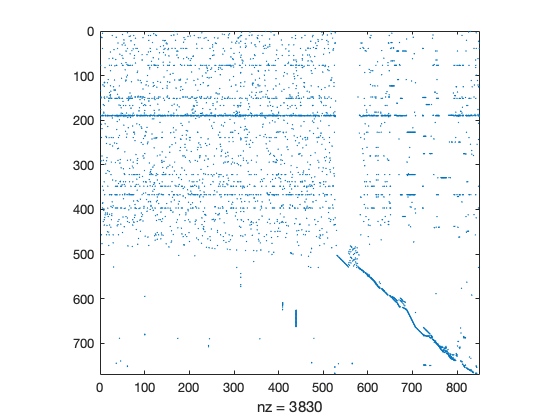

In [10]:
spy(model.S)

In [11]:
objectiveAbbr = checkObjective(model)


summaryT = 

    Coefficient      Metabolite      metID    Reaction    RxnID
    ___________    ______________    _____    ________    _____

     -0.5099       bm_pro_c           76      BOF         121  
          30       pi_c               77      BOF         121  
     -0.0793       bm_cw_c           122      BOF         121  
          30       adp_c             151      BOF         121  
     -0.0221       bm_pigm_c         178      BOF         121  
         -30       h2o_c             189      BOF         121  
          30       h_c               190      BOF         121  
    -0.00119       bm_cofactors_c    240      BOF         121  
     -0.1133       bm_rna_c          262      BOF         121  
     -0.0073       bm_dna_c          301      BOF         121  
     -0.0975       bm_carbs_c        340      BOF         121  
     -0.1587       bm_memlip_c       355      BOF         121  
         -30       atp_c             367      BOF         121  


objectiveAbbr = 

    '

In [12]:
% To know which medium constraints are applied to the model, we can use the following function:

printUptakeBound(model);

SK_amylose_c	-1000	
EX_h2o_e	-100	
EX_o2_e	-100	
EX_co2_e	-1.99	
EX_cobalt2_e	-1.7e-05	
EX_zn2_e	-7.7e-05	
EX_so4_e	-0.03	
EX_ca2_e	-0.024	
EX_nh4_e	-0.0031	
EX_mn2_e	-0.0009	
EX_hco3_e	-1.99	
EX_mg2_e	-0.03	
EX_cu2_e	-3e-05	
EX_k_e	-0.046	
EX_no3_e	-1.76	
EX_fe3_e	-0.001	
EX_mobd_e	-0.00016	
EX_na1_e	-1.79854	
EX_h_e	-100	
EX_pi_e	-0.023	
EX_photon410_e	-1000	
EX_photon430_e	-1000	
EX_photon450_e	-1000	
EX_photon470_e	-1000	
EX_photon490_e	-1000	
EX_photon510_e	-1000	
EX_photon530_e	-1000	
EX_photon550_e	-1000	
EX_photon570_e	-1000	
EX_photon590_e	-1000	
EX_photon610_e	-1000	
EX_photon630_e	-1000	
EX_photon650_e	-1000	
EX_photon670_e	-1000	
EX_photon690_e	-1000	


In [13]:
BiomassComponents = model.mets(find(model.S(:, strmatch('BOF', model.rxns))))


BiomassComponents = 

    'bm_pro_c'
    'pi_c'
    'bm_cw_c'
    'adp_c'
    'bm_pigm_c'
    'h2o_c'
    'h_c'
    'bm_cofactors_c'
    'bm_rna_c'
    'bm_dna_c'
    'bm_carbs_c'
    'bm_memlip_c'
    'atp_c'



In [14]:
clear TableProp
r = 1;
TableProp(r, :) = {'Model'}; r = r+1;

In [15]:
TableProp(r, 1) = {'Reactions'};
TableProp{r, 2} = num2str(length(model.rxns));
r = r + 1;

In [16]:
TableProp(r, 1) = {'Metabolites'};
TableProp{r, 2} = num2str(length(model.mets));
r = r + 1;

In [17]:
TableProp(r, 1) = {'Metabolites (unique)'};
[g, remR3M] = strtok(model.mets,'[');
TableProp{r, 2} = num2str(length(unique(g)));
r = r + 1;

In [18]:
TableProp(r, 1) = {'Compartments (unique)'};
TableProp{r, 2} = num2str(length(unique(remR3M)));
r = r + 1;

In [19]:
TableProp(r, 1) = {'Genes (unique)'};
[g,rem]=strtok(model.genes,'.');
TableProp{r, 2} = num2str(length(unique(g)));
r = r + 1;

In [20]:
TableProp(r, 1) = {'Subsystems'};
TableProp{r, 2} = num2str(length(unique(model.subSystems)));
r = r + 1;

In [21]:
TableProp(r, 1) = {'Deadends'};
D3M = detectDeadEnds(model);
TableProp{r, 2} = num2str(length(D3M));
r = r + 1;

In [22]:
TableProp(r, 1) = {'Size of S'};
TableProp{r, 2} = strcat(num2str(size(model.S,1)),'; ',num2str(size(model.S,2)));
r = r + 1;

In [23]:
TableProp(r, 1) = {'Rank of S'};
TableProp{r, 2} = strcat(num2str(rank(full(model.S))));
r = r + 1;

In [24]:
TableProp(r, 1) = {'Percentage nz'};
TableProp{r, 2} = strcat(num2str((nnz(model.S)/(size(model.S,1)*size(model.S,2)))));
r = r + 1;

In [25]:
TableProp


TableProp = 

    'Model'                            []
    'Reactions'                '850'     
    'Metabolites'              '768'     
    'Metabolites (unique)'     '768'     
    'Compartments (unique)'    '1'       
    'Genes (unique)'           '785'     
    'Subsystems'               '51'      
    'Deadends'                 '44'      
    'Size of S'                '768;850' 
    'Rank of S'                '732'     
    'Percentage nz'            '0.005867'



In [26]:
model.csense


ans =

EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE



In [27]:
% this displays an array with reaction names and flux bounds.
[{'Reaction ID', 'Lower Bound', 'Upper Bound'};...
model.rxns, num2cell(model.lb), num2cell(model.ub)]


ans = 

    'Reaction ID'          'Lower Bound'    'Upper Bound'
    'QULNS'                [          0]    [       1000]
    'ORNDC'                [          0]    [       1000]
    'LEUTA'                [      -1000]    [       1000]
    'MSBENZMT'             [          0]    [       1000]
    'DESAT18a'             [      -1000]    [       1000]
    'FUM'                  [      -1000]    [       1000]
    'PHYFXOR'              [          0]    [       1000]
    'VPAMTr'               [          0]    [       1000]
    'GLYCL'                [          0]    [       1000]
    'NDPK7'                [      -1000]    [       1000]
    'GTPCI'                [          0]    [       1000]
    'MTHFC'                [      -1000]    [       1000]
    'LYCBC2'               [      -1000]    [       1000]
    'ORNTA'                [      -1000]    [       1000]
    'UPPDC1'               [          0]    [       1000]
    'GARFT'                [          0]    [       1000]
    '

    'DHAD1'                [          0]    [       1000]
    'IPPS'                 [          0]    [       1000]
    'PPBNGS'               [          0]    [       1000]
    'PRE3BS'               [          0]    [       1000]
    'PHYTES2'              [          0]    [       1000]
    '3HAD80'               [      -1000]    [       1000]
    'LTHRK'                [          0]    [       1000]
    'PPS'                  [          0]    [       1000]
    'ADCPS2'               [          0]    [       1000]
    'GF6PTA'               [      -1000]    [       1000]
    'O2tpp'                [      -1000]    [       1000]
    'PGMT'                 [      -1000]    [       1000]
    '3OAR140'              [      -1000]    [       1000]
    'NMNS'                 [      -1000]    [       1000]
    'NDPK2'                [      -1000]    [       1000]
    'AGDI'                 [          0]    [       1000]
    'LPADSS2'              [          0]    [       1000]
    'DPR'     

    'KARI_23dhmp'          [          0]    [       1000]
    'IPMD'                 [          0]    [       1000]
    '3PGtcx'               [          0]    [       1000]
    'CDPMEK'               [          0]    [       1000]
    'CITCIa'               [      -1000]    [       1000]
    'SUCDum'               [      -1000]    [       1000]
    'DVOCHR'               [          0]    [       1000]
    'H2CO3_NAt_syn'        [      -1000]    [       1000]
    'HEMEOS'               [      -1000]    [       1000]
    'ALAD_L'               [      -1000]    [       1000]
    'RPE'                  [      -1000]    [       1000]
    'MPOMT'                [          0]    [       1000]
    'NDHPQRum'             [          0]    [       1000]
    'UAMAS'                [          0]    [       1000]
    'CITCIb'               [      -1000]    [       1000]
    'BPNT2'                [          0]    [       1000]
    'BM_COFACTORS'         [          0]    [       1000]
    'DCTPD2'  

    'G1SAT'                [      -1000]    [       1000]
    'ILETA'                [      -1000]    [       1000]
    'PDS1'                 [          0]    [       1000]
    'UAAGDS'               [          0]    [       1000]
    'GLCDBRAN3'            [          0]    [       1000]
    'HEX1'                 [          0]    [       1000]
    'ATPSum'               [      -1000]    [       1000]
    'CHPHYS'               [          0]    [       1000]
    'BCAROHX'              [          0]    [       1000]
    'GLYCLTDx'             [          0]    [       1000]
    'PIuabcpp'             [          0]    [       1000]
    'PC20M'                [          0]    [       1000]
    'ADSS'                 [          0]    [       1000]
    'BM_RNA'               [          0]    [       1000]
    'DM_dialurate_c'       [          0]    [       1000]
    'THRPD'                [          0]    [       1000]
    'TMDS3'                [          0]    [       1000]
    'DHFR'    

    'ENOPH'                [          0]    [       1000]
    'ARD'                  [          0]    [       1000]
    'UNK3'                 [          0]    [       1000]
    'PHYPQOX'              [          0]    [       1000]
    'ZISO'                 [          0]    [       1000]
    'ZCARDS'               [          0]    [       1000]
    'PLYCOI'               [          0]    [       1000]
    'CHLADMT'              [          0]    [       1000]
    'PHEOASE'              [          0]    [       1000]
    'PHEOX'                [          0]    [       1000]
    'PHYTK'                [          0]    [       1000]
    'TRNFE'                [      -1000]    [       1000]
    'PTHPS'                [          0]    [       1000]
    'SPR'                  [          0]    [       1000]
    'THBTGT'               [          0]    [       1000]
    'NADDP'                [          0]    [       1000]
    'CYSDS'                [          0]    [       1000]
    'THISAT'  

    'ZXANHX'               [          0]    [       1000]
    'CXANHX'               [          0]    [       1000]
    'PHOA410um'            [          0]    [       1000]
    'PHOA430um'            [          0]    [       1000]
    'PHOA450um'            [          0]    [       1000]
    'PHOA470um'            [          0]    [       1000]
    'PHOA490um'            [          0]    [       1000]
    'PHOA510um'            [          0]    [       1000]
    'PHOA530um'            [          0]    [       1000]
    'PHOA550um'            [          0]    [       1000]
    'PHOA570um'            [          0]    [       1000]
    'PHOA590um'            [          0]    [       1000]
    'PHOA610um'            [          0]    [       1000]
    'PHOA630um'            [          0]    [       1000]
    'PHOA650um'            [          0]    [       1000]
    'PHOA670um'            [          0]    [       1000]
    'PHOA690um'            [          0]    [       1000]
    'DM_pho_lo

In [28]:
%% Model preparation

% Suggested non-network constraints from supplemental material
% 1) couple flux between transketolase and phophoketolase to make PDH
% essential
model.S(end+1,:) = 0;
model.b(end+1) = 0;
model.mets{end+1} = 'pkcc';
model.metNames{end+1} = 'Transketolase/Phosphoketolase coupling constraint';
model.csense(end+1) = 'G'; % such that 0.01*vTKT2 - vPKETF(or PKETX) >= 0
tkt2 = findRxnIDs(model,'TKT2');
pkf = findRxnIDs(model,'PKETF');
pkx = findRxnIDs(model,'PKETX');
model.S(end,pkf) = -1;
model.S(end,pkx) = -1;
model.S(end,tkt2) = -0.01;
model = addDemandReaction(model,'pkcc');

% 2) make VPAMTr irreversible towards alanine, forces use of GLUSfx
vpamt = findRxnIDs(model,'VPAMTr');
model.lb(vpamt)=-1000;
model.ub(vpamt)=0;

%3) transhydrogenase carries no flux
model = changeRxnBounds(model,'NADTRHD',0,'b');

%4) set transaldolase as irreversible towards e4p/f6p
model = changeRxnBounds(model,'TALA',0,'l');

%5) ornitine transaminase carries no flux; based on essentiality of proline and asparagine biosynthetic pathways
model = changeRxnBounds(model,'ORNTA',0,'b');

%6) CYOOum carries no flux
model = changeRxnBounds(model,'CYOOum',0,'b');

%7) LDH_D irrev way from pyruvate
model = changeRxnBounds(model,'LDH_D',0,'u');

DM_pkcc	pkcc 	->	


In [29]:
% this displays an array with reaction names and flux bounds.
[{'Reaction ID', 'Lower Bound', 'Upper Bound'};...
model.rxns, num2cell(model.lb), num2cell(model.ub)]


ans = 

    'Reaction ID'          'Lower Bound'    'Upper Bound'
    'QULNS'                [          0]    [       1000]
    'ORNDC'                [          0]    [       1000]
    'LEUTA'                [      -1000]    [       1000]
    'MSBENZMT'             [          0]    [       1000]
    'DESAT18a'             [      -1000]    [       1000]
    'FUM'                  [      -1000]    [       1000]
    'PHYFXOR'              [          0]    [       1000]
    'VPAMTr'               [      -1000]    [          0]
    'GLYCL'                [          0]    [       1000]
    'NDPK7'                [      -1000]    [       1000]
    'GTPCI'                [          0]    [       1000]
    'MTHFC'                [      -1000]    [       1000]
    'LYCBC2'               [      -1000]    [       1000]
    'ORNTA'                [          0]    [          0]
    'UPPDC1'               [          0]    [       1000]
    'GARFT'                [          0]    [       1000]
    '

    'DHAD1'                [          0]    [       1000]
    'IPPS'                 [          0]    [       1000]
    'PPBNGS'               [          0]    [       1000]
    'PRE3BS'               [          0]    [       1000]
    'PHYTES2'              [          0]    [       1000]
    '3HAD80'               [      -1000]    [       1000]
    'LTHRK'                [          0]    [       1000]
    'PPS'                  [          0]    [       1000]
    'ADCPS2'               [          0]    [       1000]
    'GF6PTA'               [      -1000]    [       1000]
    'O2tpp'                [      -1000]    [       1000]
    'PGMT'                 [      -1000]    [       1000]
    '3OAR140'              [      -1000]    [       1000]
    'NMNS'                 [      -1000]    [       1000]
    'NDPK2'                [      -1000]    [       1000]
    'AGDI'                 [          0]    [       1000]
    'LPADSS2'              [          0]    [       1000]
    'DPR'     

    'KARI_23dhmp'          [          0]    [       1000]
    'IPMD'                 [          0]    [       1000]
    '3PGtcx'               [          0]    [       1000]
    'CDPMEK'               [          0]    [       1000]
    'CITCIa'               [      -1000]    [       1000]
    'SUCDum'               [      -1000]    [       1000]
    'DVOCHR'               [          0]    [       1000]
    'H2CO3_NAt_syn'        [      -1000]    [       1000]
    'HEMEOS'               [      -1000]    [       1000]
    'ALAD_L'               [      -1000]    [       1000]
    'RPE'                  [      -1000]    [       1000]
    'MPOMT'                [          0]    [       1000]
    'NDHPQRum'             [          0]    [       1000]
    'UAMAS'                [          0]    [       1000]
    'CITCIb'               [      -1000]    [       1000]
    'BPNT2'                [          0]    [       1000]
    'BM_COFACTORS'         [          0]    [       1000]
    'DCTPD2'  

    'G1SAT'                [      -1000]    [       1000]
    'ILETA'                [      -1000]    [       1000]
    'PDS1'                 [          0]    [       1000]
    'UAAGDS'               [          0]    [       1000]
    'GLCDBRAN3'            [          0]    [       1000]
    'HEX1'                 [          0]    [       1000]
    'ATPSum'               [      -1000]    [       1000]
    'CHPHYS'               [          0]    [       1000]
    'BCAROHX'              [          0]    [       1000]
    'GLYCLTDx'             [          0]    [       1000]
    'PIuabcpp'             [          0]    [       1000]
    'PC20M'                [          0]    [       1000]
    'ADSS'                 [          0]    [       1000]
    'BM_RNA'               [          0]    [       1000]
    'DM_dialurate_c'       [          0]    [       1000]
    'THRPD'                [          0]    [       1000]
    'TMDS3'                [          0]    [       1000]
    'DHFR'    

    'ENOPH'                [          0]    [       1000]
    'ARD'                  [          0]    [       1000]
    'UNK3'                 [          0]    [       1000]
    'PHYPQOX'              [          0]    [       1000]
    'ZISO'                 [          0]    [       1000]
    'ZCARDS'               [          0]    [       1000]
    'PLYCOI'               [          0]    [       1000]
    'CHLADMT'              [          0]    [       1000]
    'PHEOASE'              [          0]    [       1000]
    'PHEOX'                [          0]    [       1000]
    'PHYTK'                [          0]    [       1000]
    'TRNFE'                [      -1000]    [       1000]
    'PTHPS'                [          0]    [       1000]
    'SPR'                  [          0]    [       1000]
    'THBTGT'               [          0]    [       1000]
    'NADDP'                [          0]    [       1000]
    'CYSDS'                [          0]    [       1000]
    'THISAT'  

    'ZXANHX'               [          0]    [       1000]
    'CXANHX'               [          0]    [       1000]
    'PHOA410um'            [          0]    [       1000]
    'PHOA430um'            [          0]    [       1000]
    'PHOA450um'            [          0]    [       1000]
    'PHOA470um'            [          0]    [       1000]
    'PHOA490um'            [          0]    [       1000]
    'PHOA510um'            [          0]    [       1000]
    'PHOA530um'            [          0]    [       1000]
    'PHOA550um'            [          0]    [       1000]
    'PHOA570um'            [          0]    [       1000]
    'PHOA590um'            [          0]    [       1000]
    'PHOA610um'            [          0]    [       1000]
    'PHOA630um'            [          0]    [       1000]
    'PHOA650um'            [          0]    [       1000]
    'PHOA670um'            [          0]    [       1000]
    'PHOA690um'            [          0]    [       1000]
    'DM_pho_lo

In [30]:
% Set media
% BG-11 at 100mL total volume
% # media BG-11
% # BG-11
% # NaNO3:   17.6 mM     MgSO4:         0.3 mM
% # K2HPO4:  0.23 mM     citrate:       0.031 mM
% # CaCl2:   0.24 mM     FeNH4 citrate: 0.024 mM citrate, 0.031 mM ammonia,
%                                       0.010 mM Fe3 (based on 9% amm, 16%
%                                       Fe and 75% citrate
% # Na2EDTA: 0.0027 mM   Na2CO3:        0.19 mM
% # Trace solution: 1000x
% # H3BO3:   46 mM       MnCl2:         9mM
% # ZnSO4:   0.77 mM     Na2MoO4:       1.6mM
% # CuSO4:   0.3 mM      Co(NO3)2:      0.17 mM
% open up all exchange reaction so that products can be released
ex_r = strmatch('EX_',model.rxns);
for i = 1:length(ex_r)
    model.lb(ex_r(i)) = 0;
    model.ub(ex_r(i)) = 1000;
end
rxns = {'EX_h2o_e';'EX_o2_e';'EX_co2_e';'EX_cobalt2_e';'EX_zn2_e';'EX_so4_e';'EX_ca2_e';'EX_nh4_e';'EX_mn2_e';'EX_hco3_e';'EX_mg2_e';'EX_cu2_e';'EX_k_e';'EX_no3_e';'EX_fe3_e';'EX_mobd_e';'EX_na1_e';'EX_h_e';'EX_pi_e'};
bound = [-1000;-1000;-1000;-1.70000000000000e-05;-7.70000000000000e-05;-0.0300000000000000;-0.0240000000000000;-0.00310000000000000;-0.000900000000000000;-0.0190000000000000;-0.0300000000000000;-3.00000000000000e-05;-0.0460000000000000;-1.76000000000000;-0.00200000000000000;-0.000160000000000000;-1.79854000000000;-1000;-0.0230000000000000];
for i = 1:length(rxns)
    index = strmatch(rxns{i},model.rxns,'exact');
    model.lb(index)=bound(i);
end


In [31]:
% Set photon uptake constraints
% This file assigns the optical absorption cross-section, the chlorophyll a
% composiiton of the biomass and the spectral irradiance.

% a is a*(bin) = optical absorption cross-section of the 20nm bin
% normalized to mg chl a; units: cm^2/mg ChlA

oabxc = [460.700000000000,598.900000000000,565.500000000000,415.200000000000,352.900000000000,277.700000000000,157.300000000000,124.300000000000,146.800000000000,193.200000000000,263.700000000000,335.800000000000,269,303.600000000000,267.700000000000];
% mean = [460.700000000000,598.900000000000,565.500000000000,415.200000000000,352.900000000000,277.700000000000,157.300000000000,124.300000000000,146.800000000000,193.200000000000,263.700000000000,335.800000000000,269,303.600000000000,267.700000000000]
% ub95 = [495.500000000000,645.300000000000,608.300000000000,446.400000000000,379.300000000000,298.600000000000,169.300000000000,133.800000000000,157.700000000000,207.900000000000,285.200000000000,364,291.200000000000,328,289.300000000000]
% lb95 = [425.900000000000,552.500000000000,522.600000000000,384,326.400000000000,256.800000000000,145.300000000000,114.900000000000,135.900000000000,178.500000000000,242.300000000000,307.600000000000,246.900000000000,279.100000000000,246]

disp('Optical absorption cross section')
disp('     nm         a*');
bins = [410;430;450;470;490;510;530;550;570;590;610;630;650;670;690];

disp([bins,oabxc']);

% Get chla composition of the biomass in mg Chla/1000 mg biomass
% Chla as a percent of pigments

r = strmatch('BM_PIGMENTS',model.rxns,'exact');
m1 = strmatch('cholphya_c',model.mets,'exact');
[~,~,chla_stoich] = find(model.S(m1,r));

chla = chla_stoich*893.4861/1000;% umol chla * umol/mg

% get pigments as a percent of biomass
r = strmatch('BOF',model.rxns,'exact');
m2 = strmatch('bm_pigm_c',model.mets,'exact');
[~,~,pigm] = find(model.S(m2,r));
a = oabxc.*(chla*pigm);

% Relative spectral distribution of Octron 741 4100K 32W light source
relArea = [0.0334,0.0931,0.0427,0.0400,0.0750,0.0238,0.0424,0.2089,0.0675,0.1089,0.1601,0.0595,0.0213,0.0141,0.0093];
conv = 60*60/10000; %converts photon flux from umol/(m2*s) to umol/(cm2*h)
irrad = [68]; %irradiance in uE
str_to_print = strcat('Irradiance: ',num2str(irrad));
disp(str_to_print);
pfd = relArea.*(conv);
% photon absorbtion rate = a*(bin) x photon flux density
pha = a.*pfd; %umol photons/(mgDW*h)
% xphr are exchange photon reactions
xphr = {'EX_photon410_e', 'EX_photon430_e', 'EX_photon450_e', 'EX_photon470_e', 'EX_photon490_e', 'EX_photon510_e', 'EX_photon530_e', 'EX_photon550_e', 'EX_photon570_e', 'EX_photon590_e', 'EX_photon610_e', 'EX_photon630_e', 'EX_photon650_e', 'EX_photon670_e', 'EX_photon690_e'};




Optical absorption cross section
     nm         a*
  410.0000  460.7000
  430.0000  598.9000
  450.0000  565.5000
  470.0000  415.2000
  490.0000  352.9000
  510.0000  277.7000
  530.0000  157.3000
  550.0000  124.3000
  570.0000  146.8000
  590.0000  193.2000
  610.0000  263.7000
  630.0000  335.8000
  650.0000  269.0000
  670.0000  303.6000
  690.0000  267.7000

Irradiance:68


In [32]:
%% Additional initializing values
% 2% of the culture volume in each ring
vol = [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2];
% initial mgDW of inoculation in a 100mL flask
iDW = 7.1; 
%area used for photon delivery
xsec = 54.3;
% relative volume
rv = vol./100;

In [ ]:
%% Calculates self-shading growth rate
results = []; %initialize the results variable

for z = 1:length(irrad) % If more than one irradiance is to be simulated
    % Reset media for new simulation at new irradiance
    ex_r = strmatch('EX_',model.rxns);
    for i = 1:length(ex_r)
        model.lb(ex_r(i)) = 0;
        model.ub(ex_r(i)) = 1000000;
    end
    rxns = {'EX_h2o_e';'EX_o2_e';'EX_co2_e';'EX_cobalt2_e';'EX_zn2_e';'EX_so4_e';'EX_ca2_e';'EX_nh4_e';'EX_mn2_e';'EX_hco3_e';'EX_mg2_e';'EX_cu2_e';'EX_k_e';'EX_no3_e';'EX_fe3_e';'EX_mobd_e';'EX_na1_e';'EX_h_e';'EX_pi_e'};
    bound = [-1000;-1000;-1000;-1.70000000000000e-05;-7.70000000000000e-05;-0.0300000000000000;-0.0240000000000000;-0.00310000000000000;-0.000900000000000000;-0.0190000000000000;-0.0300000000000000;-3.00000000000000e-05;-0.0460000000000000;-1.76000000000000;-0.00200000000000000;-0.000160000000000000;-1.79854000000000;-1000;-0.0230000000000000];
    bound = bound*1000;
    for i = 1:length(model.rxns)
        model.lb(i) = model.lb(i)*1000;
        model.ub(i) = model.ub(i)*1000;
    end
    for i = 1:length(rxns)
        index = strmatch(rxns{i},model.rxns,'exact');
        model.lb(index)=bound(i);
    end

    % set interval spacing in hours
    hours = linspace(1,240,240);
    gDW = iDW; %Set the initial biomass at inoculation
    plot_me = []; %initialize variable for plotting
    plot_me = [plot_me;iDW];
    % initialize variables for output
    biomass = []; % biomass production over the simulation interval
    biomass = [biomass;iDW];

    for i = 1:length(hours)
        h = 1; %Time interval of simulation in hours
        tpbm = 0; %initialize a variable to collect the biomass from each slice
        tppi = 0; %initialize a variable to collect the phosphate uptake from each slice
        atten = zeros(1,length(xphr)); % initializes the variable to take light attenuation into account
        for s = 1:length(vol)
            sDW = rv(s)*gDW; %sets proportion of biomass in the current slice
            spha = pha.*(sDW*irrad(z)*h); %sets photon absorption rate for the slice
            sphd = pfd.*(xsec*irrad(z)*h); %sets photon delivery rate for the slice
            
            % adjust for attenuation
            for at = 1:length(sphd)
                initial = sphd(at);
                atvalue = atten(at);
                sphd(at) = sphd(at)+atten(at);
            end

            % set all negative values to 0 photon delivery
            for si = 1:length(sphd)
                in = sphd(si);
                if in < 0
                    sphd(si) = 0;
                end
            end

            %General constraints
            
            %Maintenance
            model = changeRxnBounds(model,'NGAM',(0.071*h*sDW),'l'); %non-growth associated maintenance
            %Carbon uptake
            cup = -2.0*sDW*h; %CO2 uptake, arbitrary, high value
            bicup = -2.0*sDW*h; % Bicarb uptake, arbitrary, high value
            model = changeRxnBounds(model,'EX_co2_e',cup,'l');
            model = changeRxnBounds(model,'EX_hco3_e',bicup,'l');
            %O2 evolution, P(I)=Ps(1-e^(-a*I/Ps))*e^(-BI/Ps) Platt fitting of
            %O2 evolution; Ps = 153, a = 1.42, B = 9.3E-14, I = irradiance
            o2rate =  153*(1-exp(-1.42*irrad(z)/153))*(exp(-9.3E-14*irrad(z)/153));
            o2evo = o2rate*sDW*h*(10/1000); %Chl a is 1% of biomass
            model = changeRxnBounds(model,'EX_o2_e',o2evo,'u');
            % PSII max rate = 700umol O2/(mgChlA*hr)
            psii_max = 7*sDW*h;
            model = changeRxnBounds(model,'PSIIum',psii_max,'u');
            % Set photon exchange bounds
            for r = 1:length(xphr)

                if spha(r) < (sphd(r))
                    model = changeRxnBounds(model,xphr{r},spha(r)*-0.9999,'u');
                    model = changeRxnBounds(model,xphr{r},spha(r)*-1,'l');
                else
                    model = changeRxnBounds(model,xphr{r},sphd(r)*-0.9999,'u');
                    model = changeRxnBounds(model,xphr{r},sphd(r)*-1,'l');
                end

            end
            model = changeObjective(model,'BOF'); %Set objective to max growth
            solution = optimizeCbModel(model);
            % collect biomass, update attenuated light and pi usage
            if solution.stat == 1
                tpbm = tpbm+solution.f;
                % account for phosphate fixed into biomass
                phos = strmatch('EX_pi_e',model.rxns);
                vals = solution.x(phos);
                tppi = tppi+vals;
            else
                tpbm = tpbm+0;
                % account for phosphate fixed into biomass
                tppi = tppi+0;
            end
            % Account for light attenuation for the next round
            for r = 1:length(xphr)
                rxn = findRxnIDs(model,xphr{r});
                flux = model.lb(rxn);
                atten(r)=atten(r)+flux;
            end

        end
        % update gDW with the sum of the biomass from all slices
        gDW = gDW+tpbm;
        biomass = [biomass;gDW];
        %update phosphate bounds 
        new_bound = model.lb(phos)-tppi;
        if new_bound > 0
            new_bound = 0;
        end
        plot_i = linspace(24,240,10);
        if ismember(i,plot_i)
            plot_me = [plot_me;gDW];
        end
        model = changeRxnBounds(model,'EX_pi_e',new_bound,'l');
        [i,gDW,new_bound];
        
        end
        results = [results,biomass];
end

In [ ]:
results = []; %initialize the results variable
%% Execute the simulation of self-shading
S1_self_shading
self = results;
%% Execute the simulation of no-shading
results = [];
S2_no_shading

In [ ]:
plot_results

In [ ]:
model.mets

In [ ]:
model.rxns

In [ ]:
% this displays an array with reaction names and flux bounds.
[{'Reaction ID', 'Lower Bound', 'Upper Bound'};...
model.rxns, num2cell(model.lb), num2cell(model.ub)]

In [ ]:
genes = cellstr(model.genes(1:10));
geneIDs = findGeneIDs(model, model.genes(1:10)); printLabeledData(model.genes(1:10),geneIDs)

In [ ]:
findGeneIDs(model, 'Synpcc7942_1007')

In [ ]:
rxnIDs = findRxnIDs(model, model.rxns(1:15)); printLabeledData(model.rxns(1:15),rxnIDs)

In [ ]:
rxnIDs = findRxnIDs(model, model.rxns(1:15)); printLabeledData(model.rxns(1:15),rxnIDs)